# 03 - Exploratory Data Analysis

## 3.1 Table of Contents:



## 3.2 Introduction:

The goal of this step is to explore the dataset to gain insight and just have fun answering general questions about movies. We also plan on using visual representation to identify key factors/columns in our dataset that effect variables identified in the pervious section for each of our movie recommendation systems. Below is a brief refresher of each recommendation system and what dependent variable(s) we plan on using.

i. Simple recommender: non-personalized recommendation based on general popularity. We will be using demographic  ratings 'vote_average'

ii. Content-Based recommendation: Venturing into personalized recommendations. These movie recommendations are based on plot overview, genre, and other metadata similarities. This will have us using 'director', 'actor', 'genres', 'belong_to_collection' and 'keyword'. Mostly categorical variables. 

iii. Collaborative filtering: Another personalized recommendation based on the behavior and preferences of similar users. we will focus on using 'ratings' from 'df_ratings' dataset for this method.

## 3.3 Imports & Load Data: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval
import seaborn as sns
import scipy.stats

from wordcloud import WordCloud, STOPWORDS

In [2]:
metadata = pd.read_csv('../src/data/Cleaned/metadata_cleaned.csv',index_col = 0)
ratings = pd.read_csv('../src/data/Cleaned/ratings_cleaned.csv', index_col = 0)

## 3.4 Data Wrangling: 

In [3]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44984 entries, 0 to 44983
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  44984 non-null  bool   
 1   belongs_to_collection  4463 non-null   object 
 2   budget                 44984 non-null  int64  
 3   genres                 44984 non-null  object 
 4   movieId                44984 non-null  int64  
 5   original_language      44974 non-null  object 
 6   original_title         44984 non-null  object 
 7   overview               44064 non-null  object 
 8   popularity             44984 non-null  float64
 9   production_companies   44984 non-null  object 
 10  production_countries   44984 non-null  object 
 11  release_date           44906 non-null  object 
 12  revenue                44984 non-null  int64  
 13  runtime                44733 non-null  float64
 14  spoken_languages       44984 non-null  object 
 15  status 

In [4]:
metadata.T

,0,1,2,3,4,5,6,7,8,9,...,44974,44975,44976,44977,44978,44979,44980,44981,44982,44983
adult,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
belongs_to_collection,Toy Story Collection,NaN,Grumpy Old Men Collection,NaN,Father of the Bride Collection,NaN,NaN,NaN,NaN,James Bond Collection,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
budget,30000000,65000000,0,16000000,0,60000000,58000000,0,35000000,58000000,...,0,0,0,0,0,0,0,0,0,0
genres,"['Animation', 'Comedy', 'Family']","['Adventure', 'Fantasy', 'Family']","['Romance', 'Comedy']","['Comedy', 'Drama', 'Romance']",['Comedy'],"['Action', 'Crime', 'Drama', 'Thriller']","['Comedy', 'Romance']","['Action', 'Adventure', 'Drama', 'Family']","['Action', 'Adventure', 'Thriller']","['Adventure', 'Action', 'Thriller']",...,"['Horror', 'Mystery', 'Thriller']","['Mystery', 'Horror']",['Horror'],['Science Fiction'],"['Drama', 'Action', 'Romance']","['Drama', 'Family']",['Drama'],"['Action', 'Drama', 'Thriller']",[],[]
movieId,862,8844,15602,31357,11862,949,11860,45325,9091,710,...,84419,390959,289923,222848,30840,439050,111109,67758,227506,461257
original_language,en,en,en,en,en,en,en,en,en,en,...,en,en,en,en,en,fa,tl,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II,Heat,Sabrina,Tom and Huck,Sudden Death,GoldenEye,...,House of Horrors,Shadow of the Blair Witch,The Burkittsville 7,Caged Heat 3000,Robin Hood,رگ خواب,Siglo ng Pagluluwal,Betrayal,Satana likuyushchiy,Queerama
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...,"Obsessive master thief, Neil McCauley leads a ...",An ugly duckling having undergone a remarkable...,"A mischievous young boy, Tom Sawyer, witnesses...",International action superstar Jean Claude Van...,James Bond must unmask the mysterious head of ...,...,An unsuccessful sculptor saves a madman named ...,"In this true-crime documentary, we delve into ...",A film archivist revisits the story of Rustin ...,It's the year 3000 AD. The world's most danger...,"Yet another version of the classic epic, with ...",Rising and falling between a man and woman.,An artist struggles to finish his work while a...,"When one of her hits goes wrong, a professiona...","In a small town live two brothers, one a minis...",50 years after decriminalisation of homosexual...
popularity,21.946943,17.015539,11.7129,3.859495,8.387519,17.924927,6.677277,2.561161,5.23158,14.686036,...,0.222814,0.076061,0.38645,0.661558,5.683753,0.072051,0.178241,0.903007,0.003503,0.163015
production_companies,['Pixar Animation Studios'],"['TriStar Pictures', 'Teitler Film', 'Intersco...","['Warner Bros.', 'Lancaster Gate']",['Twentieth Century Fox Film Corporation'],"['Sandollar Productions', 'Touchstone Pictures']","['Regency Enterprises', 'Forward Pass', 'Warne...","['Paramount Pictures', 'Scott Rudin Production...",['Walt Disney Pictures'],"['Universal Pictures', 'Imperial Entertainment...","['United Artists', 'Eon Productions']",...,['Universal Pictures'],[],"['Neptune Salad Entertainment', 'Pirie Product...",['Concorde-New Horizons'],"['Westdeutscher Rundfunk (WDR)', 'Working Titl...",[],['Sine Olivia'],['American World Pictures'],['Yermoliev'],[]


#### 3.4.1 Data Cleaning and Transforming:

Let's explore the data and alter, clean and remove features that we don't need and make the dataset more suitable for analysis.

In [5]:
#Start off by converting string of list to list of strings. 
metadata['genres'] = metadata['genres'].apply(literal_eval).apply(lambda x: [str(i) for i in x])
metadata['production_companies'] = metadata['production_companies'].apply(literal_eval).apply(lambda x: [str(i) for i in x])
metadata['production_countries'] = metadata['production_countries'].apply(literal_eval).apply(lambda x: [str(i) for i in x])
metadata['keyword'] = metadata['keyword'].apply(literal_eval).apply(lambda x: [str(i) for i in x])
metadata['spoken_languages'] = metadata['spoken_languages'].apply(literal_eval).apply(lambda x: [str(i) for i in x])
metadata['actor_names'] = metadata['actor_names'].apply(literal_eval).apply(lambda x: [str(i) for i in x])

In [6]:
metadata['adult'].value_counts()
metadata[metadata['adult']==True].T

,19369,28484,31671,31846,39533,39534,40193,40620
adult,True,True,True,True,True,True,True,True
belongs_to_collection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
budget,0,0,0,0,0,0,0,750000
genres,[Horror],[Crime],[Comedy],"[Comedy, Drama, Romance]","[Crime, Horror]","[Comedy, Music, Romance]","[Crime, Horror]","[Thriller, Crime, Drama]"
movieId,5422,169158,44781,324230,35731,55774,39922,376004
original_language,it,en,cn,es,en,en,da,en
original_title,Le notti erotiche dei morti viventi,Standoff,發電悄嬌娃,Diet of Sex,Amateur Porn Star Killer 2,The Band,Dværgen,Adulterers
overview,A sailor takes an American businessman and his...,The FBI and Texas police make ready to storm t...,Electrical Girl centers around a horny young w...,Ágata suffers from a psychological disorder wh...,Shane Ryan's sequel to the disturbing Amateur ...,Australian film about a fictional sub-par Aust...,Olaf and his mother run a boarding house and a...,A man who returns home to find his wife cheati...
popularity,1.420104,1.349745,0.001803,6.889832,0.587751,0.417214,1.182635,1.13377
production_companies,[Stefano Film],[Trimark Pictures],[],[KeyAtomics],[Alter Ego Cinema],[],[Scandica Film],[]


In [7]:
#drop 'adult' column since there's only 8 entries in all dataset. Don't see it being usefull for us in the future.
metadata = metadata.drop('adult', axis = 1)

In [8]:
#Removed imdbID & status column as well since we will be relying on TMDB ID as movieId, 
# and the current status will be assumed as 'released' 
# 'Actor_ids' will also be dropped as we already have actor names which are client friendly than IDs.
metadata = metadata.drop('imdbId', axis = 1)
metadata = metadata.drop('status', axis = 1)
metadata = metadata.drop('actor_ids', axis = 1)

In [9]:
metadata[metadata['original_title'] != metadata['title']][['title', 'original_title']].head()

,title,original_title
28,The City of Lost Children,La Cité des Enfants Perdus
29,Shanghai Triad,摇啊摇，摇到外婆桥
32,Wings of Courage,"Guillaumet, les ailes du courage"
57,The Postman,Il postino
58,The Confessional,Le confessionnal


Looks like **'original_title'** refers to movie title in native language it was shot in, where as **'title'** is the translated English name of the movie. For the purpose of this project and to reduce complexity of language barier, i will be dropping **'original_title'** and just keep **'title'**. No essential data will be lost since we still have the **'original_language'** column the movie was shot in.

In [10]:
metadata = metadata.drop('original_title', axis = 1)

In [11]:
metadata.describe()

,budget,movieId,popularity,revenue,runtime,vote_average,vote_count
count,4.498400e+04,44984.000000,44984.000000,4.498400e+04,44733.000000,44984.000000,44984.000000
mean,4.265191e+06,108093.535813,2.938830,1.132255e+07,94.270963,5.623986,110.930575
std,1.750962e+07,112311.625749,6.024757,6.466070e+07,38.363601,1.915779,493.787335
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,26224.500000,0.390901,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,59815.000000,1.135506,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,157351.500000,3.728583,0.000000e+00,107.000000,6.800000,35.000000
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000


Let's parse **'release_year'** from **'release_date'** as it will be easier for analysis and plotting than date and time. 

Also, adding another column called **'return'** as a ratio of revenue/budget will be insightfull in telling us if a movie was profitable or a loss. This feature will be insightfull in guaging blockbuster success. ratio >1 is profitable and anything <1 is a loss.

In [12]:
metadata = metadata[metadata['release_date'].notna()]
#change 'release_date' dtype from object to datetime.
metadata['release_date'] = pd.to_datetime(metadata['release_date'], errors='coerce')
# Extract the year and create a new 'year' column.
metadata['release_year'] = metadata['release_date'].dt.year.astype('int') 

# Replacing 0's with NaN to prevent calculation error or mistakes for return 
metadata['budget'] = metadata['budget'].replace(0, np.nan)
metadata['revenue'] = metadata['revenue'].replace(0, np.nan)
# Adding 'return' column as ratio of revenue/budget
metadata['return'] = metadata['revenue']/metadata['budget']
metadata.info()
metadata.T

<class 'pandas.core.frame.DataFrame'>
Index: 44906 entries, 0 to 44983
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  4463 non-null   object        
 1   budget                 8851 non-null   float64       
 2   genres                 44906 non-null  object        
 3   movieId                44906 non-null  int64         
 4   original_language      44896 non-null  object        
 5   overview               43999 non-null  object        
 6   popularity             44906 non-null  float64       
 7   production_companies   44906 non-null  object        
 8   production_countries   44906 non-null  object        
 9   release_date           44906 non-null  datetime64[ns]
 10  revenue                7385 non-null   float64       
 11  runtime                44666 non-null  float64       
 12  spoken_languages       44906 non-null  object        
 13  taglin

,0,1,2,3,4,5,6,7,8,9,...,44973,44974,44975,44976,44977,44978,44980,44981,44982,44983
belongs_to_collection,Toy Story Collection,NaN,Grumpy Old Men Collection,NaN,Father of the Bride Collection,NaN,NaN,NaN,NaN,James Bond Collection,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
budget,30000000.0,65000000.0,NaN,16000000.0,NaN,60000000.0,58000000.0,NaN,35000000.0,58000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genres,"[Animation, Comedy, Family]","[Adventure, Fantasy, Family]","[Romance, Comedy]","[Comedy, Drama, Romance]",[Comedy],"[Action, Crime, Drama, Thriller]","[Comedy, Romance]","[Action, Adventure, Drama, Family]","[Action, Adventure, Thriller]","[Adventure, Action, Thriller]",...,[],"[Horror, Mystery, Thriller]","[Mystery, Horror]",[Horror],[Science Fiction],"[Drama, Action, Romance]",[Drama],"[Action, Drama, Thriller]",[],[]
movieId,862,8844,15602,31357,11862,949,11860,45325,9091,710,...,67179,84419,390959,289923,222848,30840,111109,67758,227506,461257
original_language,en,en,en,en,en,en,en,en,en,en,...,it,en,en,en,en,en,tl,en,en,en
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...,"Obsessive master thief, Neil McCauley leads a ...",An ugly duckling having undergone a remarkable...,"A mischievous young boy, Tom Sawyer, witnesses...",International action superstar Jean Claude Van...,James Bond must unmask the mysterious head of ...,...,Sentenced to life imprisonment for illegal act...,An unsuccessful sculptor saves a madman named ...,"In this true-crime documentary, we delve into ...",A film archivist revisits the story of Rustin ...,It's the year 3000 AD. The world's most danger...,"Yet another version of the classic epic, with ...",An artist struggles to finish his work while a...,"When one of her hits goes wrong, a professiona...","In a small town live two brothers, one a minis...",50 years after decriminalisation of homosexual...
popularity,21.946943,17.015539,11.7129,3.859495,8.387519,17.924927,6.677277,2.561161,5.23158,14.686036,...,0.225051,0.222814,0.076061,0.38645,0.661558,5.683753,0.178241,0.903007,0.003503,0.163015
production_companies,[Pixar Animation Studios],"[TriStar Pictures, Teitler Film, Interscope Co...","[Warner Bros., Lancaster Gate]",[Twentieth Century Fox Film Corporation],"[Sandollar Productions, Touchstone Pictures]","[Regency Enterprises, Forward Pass, Warner Bros.]","[Paramount Pictures, Scott Rudin Productions, ...",[Walt Disney Pictures],"[Universal Pictures, Imperial Entertainment, S...","[United Artists, Eon Productions]",...,[],[Universal Pictures],[],"[Neptune Salad Entertainment, Pirie Productions]",[Concorde-New Horizons],"[Westdeutscher Rundfunk (WDR), Working Title F...",[Sine Olivia],[American World Pictures],[Yermoliev],[]
production_countries,[US],[US],[US],[US],[US],[US],"[DE, US]",[US],[US],"[GB, US]",...,[],[US],[],[US],[US],"[CA, DE, GB, US]",[PH],[US],[RU],[GB]
release_date,1995-10-30 00:00:00,1995-12-15 00:00:00,1995-12-22 00:00:00,1995-12-22 00:00:00,1995-02-10 00:00:00,1995-12-15 00:00:00,1995-12-15 00:00:00,1995-12-22 00:00:00,1995-12-22 00:00:00,1995-11-16 00:00:00,...,1972-01-01 00:00:00,1946-03-29 00:00:00,2000-10-22 00:00:00,2000-10-03 00:00:00,1995-01-01 00:00:00,1991-05-13 00:00:00,2011-11-17 00:00:00,2003-08-01 00:00:00,1917-10-21 00:00:00,2017-06-09 00:00:00


In [13]:
#swap columns
ratings = ratings[['movieId', 'userId', 'rating']]
ratings.info()
ratings.head()

<class 'pandas.core.frame.DataFrame'>
Index: 26024289 entries, 0 to 26024288
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   movieId  int64  
 1   userId   int64  
 2   rating   float64
dtypes: float64(1), int64(2)
memory usage: 794.2 MB


,movieId,userId,rating
0,110,1,1.0
1,147,1,4.5
2,858,1,5.0
3,1221,1,5.0
4,1246,1,5.0


In [14]:
ratings.describe()

,movieId,userId,rating
count,2.602429e+07,2.602429e+07,2.602429e+07
mean,1.584911e+04,1.350371e+05,3.528090e+00
std,3.108526e+04,7.817620e+04,1.065443e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,1.073000e+03,6.716400e+04,3.000000e+00
50%,2.583000e+03,1.351630e+05,3.500000e+00
75%,6.503000e+03,2.026930e+05,4.000000e+00
max,1.762750e+05,2.708960e+05,5.000000e+00


## 3.5 Exploratory Data Analysis:

### 3.5.1 Title & Overview Wordclouds

Word clouds offer an effective means of visualizing prevalent and attention-grabbing words in titles, providing insights into the key themes that captivate audiences. An overview word cloud can illuminate the topics that hold particular appeal for viewers, shedding light on what audiences are most interested in when it comes to movies.

In [15]:
metadata['title'] = metadata['title'].astype('str')
metadata['overview'] = metadata['overview'].astype('str')

In [16]:
title_corpus = ' '.join(metadata['title'])
overview_corpus = ' '.join(metadata['overview'])

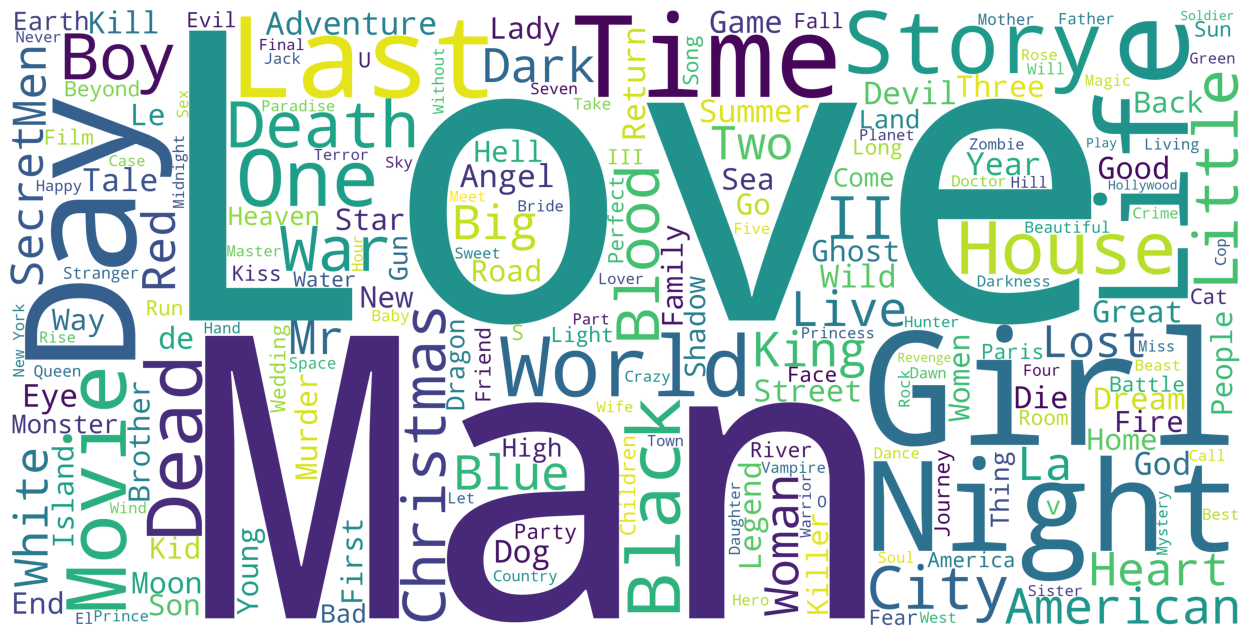

In [17]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

We see **Love** used most in Titles, followed by **Man, Girl, Day, & Night**. Intersting to see these words being used as attention grabbing. This gives you some insight that most people are attracted to relaxing, calm and simple love stories.

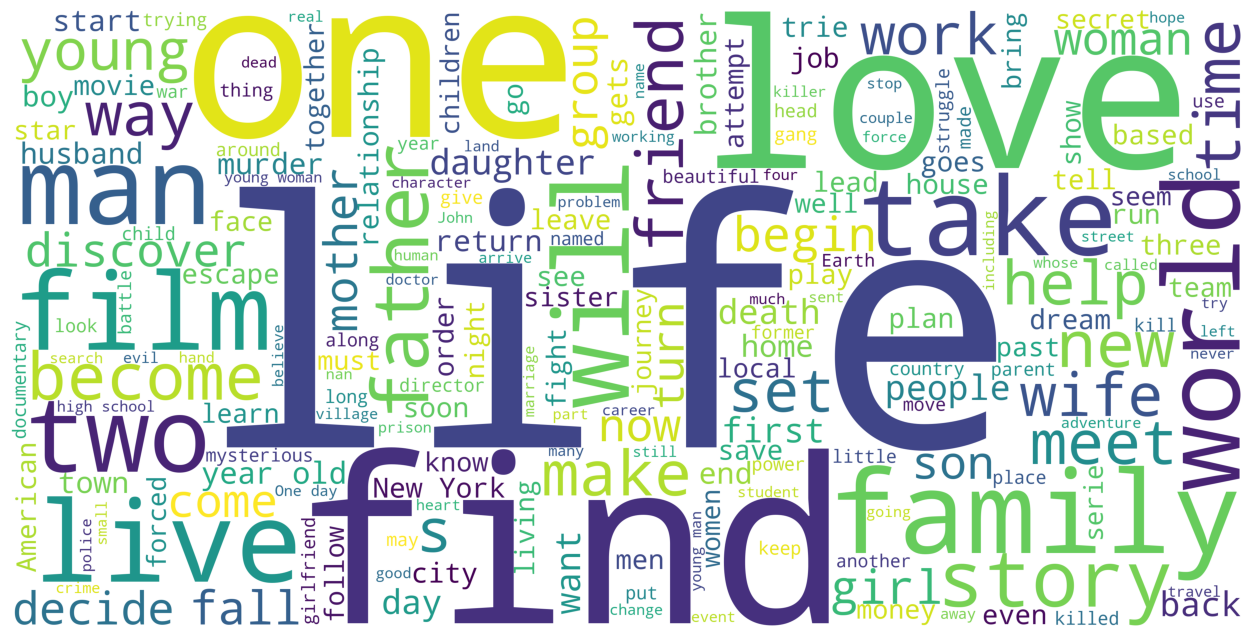

In [18]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

In the context of overviews, it's intriguing to note that words such as **Find, Life, One, and Love** emerge as the most frequently used. This observation reinforces the notion that moviegoers often seek an escape to the joyous and entertaining aspects of life through cinema.

### 3.5.2 Production Countries and Original languages

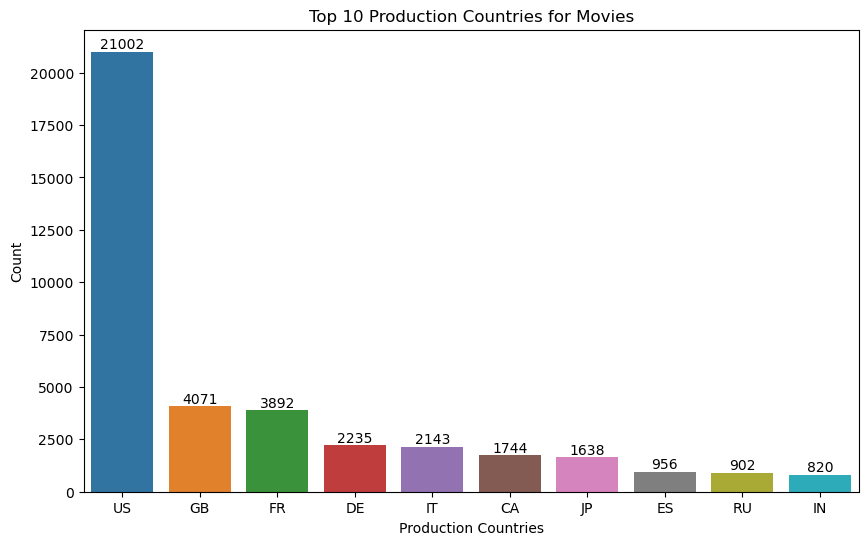

In [19]:
pd_df = metadata['production_countries'].explode()

#Get the top 10 production countries
top_countries = pd_df.value_counts().head(10)

# Create a count plot using seaborn
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=pd_df, order=top_countries.index)

# Add count labels on each bar
for p, label in zip(ax.patches, top_countries.values):
    ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Add labels and title
plt.xlabel('Production Countries')
plt.ylabel('Count')
plt.title('Top 10 Production Countries for Movies')

# Show the plot
plt.show()

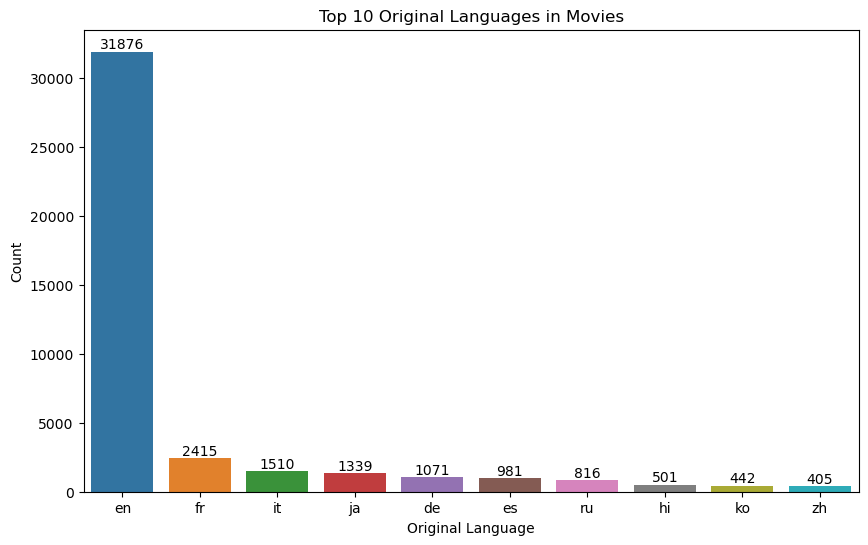

In [20]:
lang_df = metadata['original_language'].explode()

# Get the top 10 languages
top_languages = lang_df.value_counts().head(10)

# Create a count plot using seaborn
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=lang_df, order=top_languages.index)

# Add count labels on each bar
for p, label in zip(ax.patches, top_languages.values):
    ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Add labels and title
plt.xlabel('Original Language')
plt.ylabel('Count')
plt.title('Top 10 Original Languages in Movies')

# Show the plot
plt.show()

As expected majority of the movies are produced in **United States** and filmed in **English**.

### 3.5.3 Popularity, Vote Average and Vote Count

In [21]:
metadata[['vote_count', 'vote_average', 'popularity']].describe()

,vote_count,vote_average,popularity
count,44906.000000,44906.000000,44906.000000
mean,111.119138,5.629689,2.943736
std,494.195033,1.907212,6.028783
min,0.000000,0.000000,0.000000
25%,3.000000,5.000000,0.394053
50%,10.000000,6.000000,1.138695
75%,35.000000,6.800000,3.739139
max,14075.000000,10.000000,547.488298


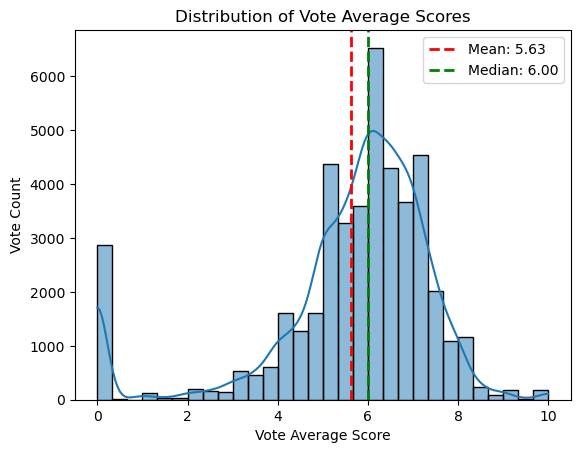

In [22]:
# Create a histogram of the 'vote_average' column
ax = sns.histplot(x='vote_average', data=metadata, bins = 30, kde=True)

# Calculate and add summary statistics
mean_vote = metadata['vote_average'].mean()
median_vote = metadata['vote_average'].median()

ax.axvline(mean_vote, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_vote:.2f}')
ax.axvline(median_vote, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_vote:.2f}')

# Add legend
plt.legend()
plt.xlabel('Vote Average Score')
plt.ylabel('Vote Count')
plt.title('Distribution of Vote Average Scores')

# Show the plot
plt.show()

**vote_average and vote_count** are our most important features we will be using in our simple recommender system. Here we can get a sense of what our data entails. 

it's clear that the **'vote_count'** for majority of the movies in this dataset are below 100 votes. For us to consider significance in vote average we need **minimum #** of **'vote_count'** per movie.

As for **vote_average** our mean in TMDB dataset is around 5.63.

### Critically Acclaimed movies

In [23]:
m = metadata['vote_count'].quantile(0.95)
print(m)

440.0


To be deemed critically acclaimed in our assessment, a movie must attain a minimum number of votes. In this context, we have selected **440** as the threshold, representing the **95th quantile** of the dataset.

In [24]:
# Subset CA_movies to movies with > 440 votes.
CA_movies = metadata[metadata['vote_count'] >=m]

In [25]:
#Sort CA_movies in desending order of vote_average
CA_movies = CA_movies.sort_values(by = 'vote_average', ascending = False).reset_index(drop=True)
CA_movies.index += 1
CA_movies[['title', 'popularity', 'release_year', 'vote_count','vote_average']].head(10)

,title,popularity,release_year,vote_count,vote_average
1,Dilwale Dulhania Le Jayenge,34.457024,1995,661.0,9.1
2,Your Name.,34.461252,2016,1030.0,8.5
3,The Godfather,41.109264,1972,6024.0,8.5
4,The Shawshank Redemption,51.645403,1994,8358.0,8.5
5,Psycho,36.826309,1960,2405.0,8.3
6,Spirited Away,41.048867,2001,3968.0,8.3
7,Schindler's List,41.725123,1993,4436.0,8.3
8,Life Is Beautiful,39.394970,1997,3643.0,8.3
9,The Godfather: Part II,36.629307,1974,3418.0,8.3
10,The Dark Knight,123.167259,2008,12269.0,8.3


These are the **Top 10 Critically Acclaimed** movies according to TMDB dataset.

### Most Popular movies

In [26]:
metadata[['title', 'popularity', 'release_year', 'vote_average']].sort_values('popularity', ascending=False).head(10)

,title,popularity,release_year,vote_average
30452,Minions,547.488298,2015,6.4
33073,Wonder Woman,294.337037,2017,7.2
41813,Beauty and the Beast,287.253654,2017,6.8
43208,Baby Driver,228.032744,2017,7.2
24277,Big Hero 6,213.849907,2014,7.8
26371,Deadpool,187.860492,2016,7.4
26372,Guardians of the Galaxy Vol. 2,185.330992,2017,7.6
14479,Avatar,185.070892,2009,7.2
24175,John Wick,183.870374,2014,7.0
23507,Gone Girl,154.801009,2014,7.9


The preceding list showcases the **Top 10 movies** based on **popularity** at the time of dataset extraction. It's important to note that this popularity ranking may vary depending on the prevailing trends during that specific time period.

### Most Voted Movies

In [27]:
metadata[['title', 'popularity', 'release_year', 'vote_count', 'vote_average']].sort_values('vote_count', ascending=False).head(10)

,title,popularity,release_year,vote_count,vote_average
15402,Inception,29.108149,2010,14075.0,8.1
12421,The Dark Knight,123.167259,2008,12269.0,8.3
14479,Avatar,185.070892,2009,12114.0,7.2
17715,The Avengers,89.887648,2012,12000.0,7.4
26371,Deadpool,187.860492,2016,11444.0,7.4
22720,Interstellar,32.213481,2014,11187.0,8.1
19923,Django Unchained,19.785025,2012,10297.0,7.8
23583,Guardians of the Galaxy,53.291601,2014,10014.0,7.9
2829,Fight Club,63.869599,1999,9678.0,8.3
18131,The Hunger Games,20.031667,2012,9634.0,6.9


Here's the **Top 10 Movies** based off most vote counts.

Clearly all 3 **vote_count, vote_average, and popularity** features provide a different list of movies. All of these a very usefull features for our recommendation systems. However, the 2 most important ones we will be focusing on are **vote_count, and vote_average**

### Correlation

/Users/mohsin/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

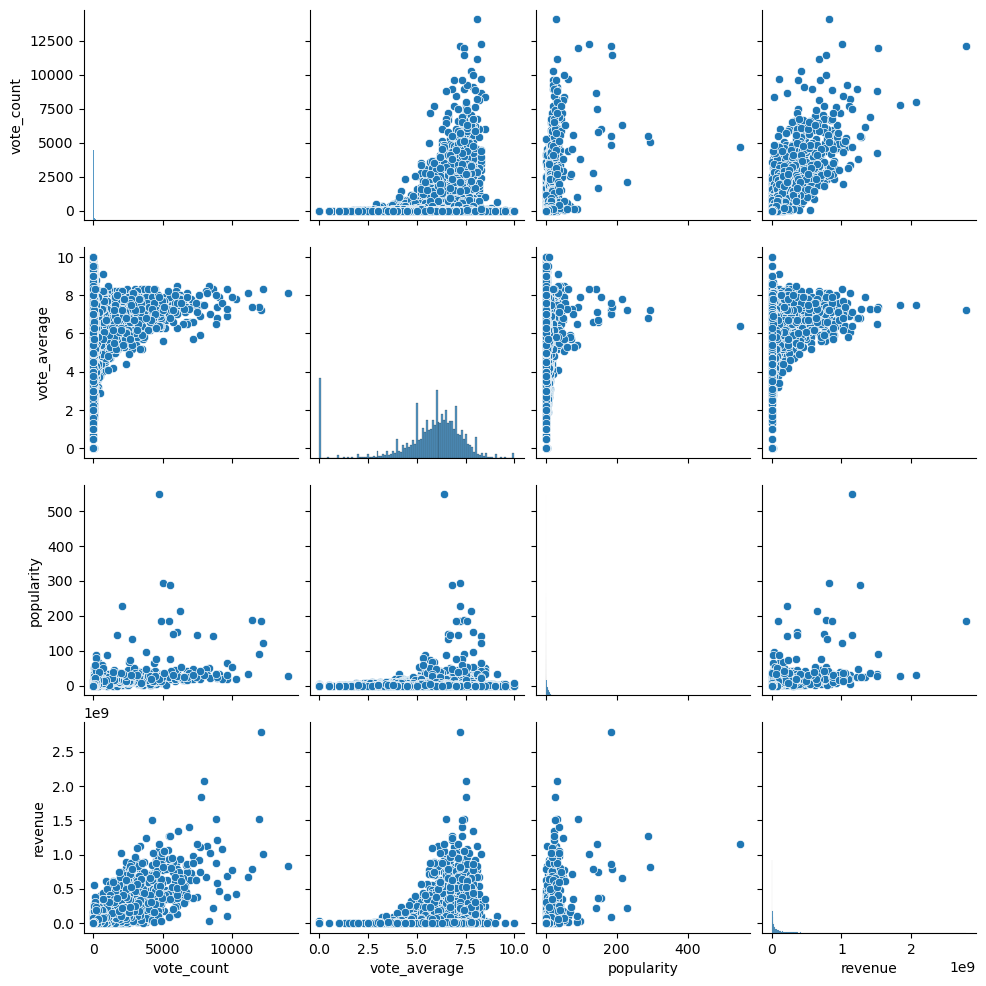

In [28]:
plt.figure(figsize=(10, 6))
sns.pairplot(metadata[['vote_count', 'vote_average', 'popularity', 'revenue']])
plt.show()

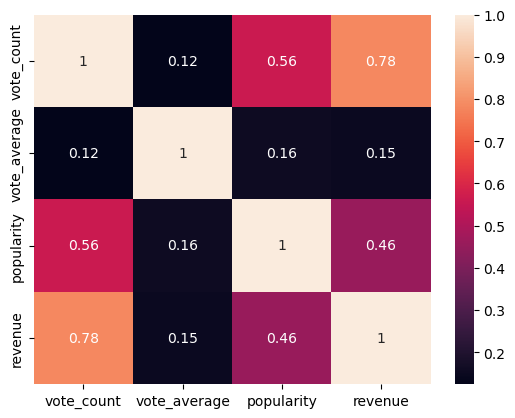

In [29]:
sns.heatmap(metadata[['vote_count', 'vote_average', 'popularity', 'revenue']].corr(), annot=True)
plt.show()

Pearson correlation heatmap above shows a fairly strong **correlation** between **vote_count and revenue** a movie generates. we can use this piece of information to predict revenue for missing data in the dataset.

### 3.5.4 Budget, Revenue and Return

In [30]:
metadata[['budget', 'revenue', 'return']].describe()

,budget,revenue,return
count,8.851000e+03,7.385000e+03,5.371000e+03
mean,2.167687e+07,6.896865e+07,5.576258e+03
std,3.436356e+07,1.466090e+08,2.170583e+05
min,1.000000e+00,1.000000e+00,5.217391e-07
25%,2.000000e+06,2.405420e+06,7.883507e-01
50%,8.200000e+06,1.687267e+07,2.058750e+00
75%,2.500000e+07,6.764269e+07,4.242222e+00
max,3.800000e+08,2.787965e+09,1.239638e+07


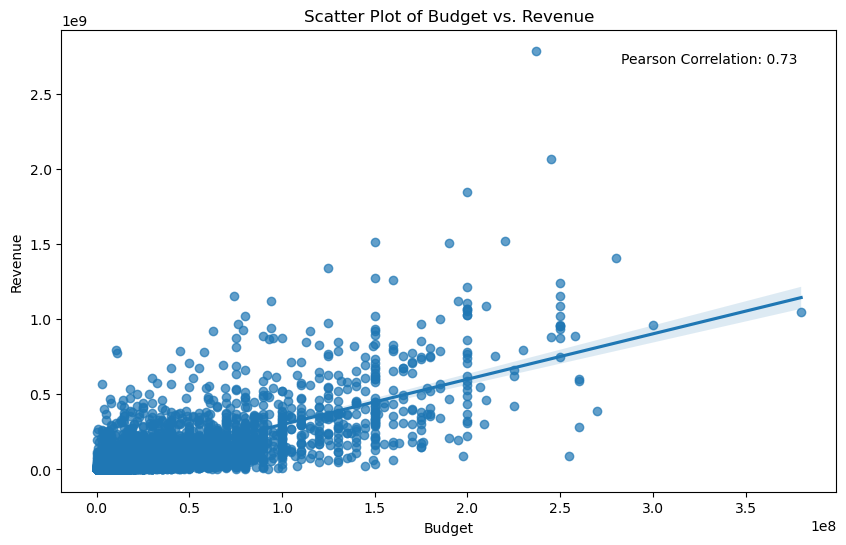

In [31]:
# Create a scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='budget', y='revenue', data=metadata, scatter_kws={'alpha':0.7})

# Add labels and title
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Scatter Plot of Budget vs. Revenue')

# Calculate Pearson correlation coefficient
corr_coefficient = metadata['budget'].corr(metadata['revenue'])
plt.text(0.95, 0.95, f'Pearson Correlation: {corr_coefficient:.2f}', transform=plt.gca().transAxes, ha='right', va='top', fontsize=10)

# Show the plot
plt.show()

There is a **0.73** correlation between **budget and revenue**. This can also come in handy in the future to pridict either budget or revenue on a givent movie database.

### Most Expensive Movies of all Time

In [32]:
metadata[metadata['budget'].notnull()][['title', 'budget', 'revenue', 'return', 'release_year']].sort_values('budget', ascending=False).head(10)

,title,budget,revenue,return,release_year
17030,Pirates of the Caribbean: On Stranger Tides,380000000.0,1.045714e+09,2.751878,2011
11768,Pirates of the Caribbean: At World's End,300000000.0,9.610000e+08,3.203333,2007
26367,Avengers: Age of Ultron,280000000.0,1.405404e+09,5.019299,2015
11010,Superman Returns,270000000.0,3.910812e+08,1.448449,2006
44380,Transformers: The Last Knight,260000000.0,6.049421e+08,2.326701,2017
16044,Tangled,260000000.0,5.917949e+08,2.276134,2010
18571,John Carter,260000000.0,2.841391e+08,1.092843,2012
11721,Spider-Man 3,258000000.0,8.908716e+08,3.452991,2007
21032,The Lone Ranger,255000000.0,8.928991e+07,0.350157,2013
42828,The Fate of the Furious,250000000.0,1.238765e+09,4.955059,2017


Of the Top 10 list the Top 2 movies with the highest budgets are **Priates of the Caribbean**

### Box Office Hits

In [33]:
metadata[metadata['revenue'].notnull()][['title', 'budget', 'revenue', 'return', 'release_year']].sort_values('revenue', ascending=False).head(10)

,title,budget,revenue,return,release_year
14479,Avatar,237000000.0,2.787965e+09,11.763566,2009
26364,Star Wars: The Force Awakens,245000000.0,2.068224e+09,8.441729,2015
1629,Titanic,200000000.0,1.845034e+09,9.225171,1997
17715,The Avengers,220000000.0,1.519558e+09,6.907081,2012
24902,Jurassic World,150000000.0,1.513529e+09,10.090192,2015
28610,Furious 7,190000000.0,1.506249e+09,7.927628,2015
26367,Avengers: Age of Ultron,280000000.0,1.405404e+09,5.019299,2015
17339,Harry Potter and the Deathly Hallows: Part 2,125000000.0,1.342000e+09,10.736000,2011
21956,Frozen,150000000.0,1.274219e+09,8.494793,2013
41813,Beauty and the Beast,160000000.0,1.262886e+09,7.893040,2017


**Avatar** ranks as the hightest grossing movie bringging in over $2.79 Billion. That's crazy amount of money for a movie. 

### Highest Return on Investement for a movie. 

In [34]:
metadata[(metadata['return'].notnull()) & (metadata['budget'] > 5e6)][['title', 'budget', 'revenue', 'return', 'release_year']].sort_values('return', ascending=False).head(10)

,title,budget,revenue,return,release_year
1060,E.T. the Extra-Terrestrial,10500000.0,792965326.0,75.520507,1982
255,Star Wars,11000000.0,775398007.0,70.490728,1977
1333,Jaws,7000000.0,470654000.0,67.236286,1975
1877,The Exorcist,8000000.0,441306145.0,55.163268,1973
351,Four Weddings and a Funeral,6000000.0,254700832.0,42.450139,1994
830,The Godfather,6000000.0,245066411.0,40.844402,1972
4470,Look Who's Talking,7500000.0,296000000.0,39.466667,1989
24083,Annabelle,6500000.0,255273813.0,39.272894,2014
1051,Dirty Dancing,6000000.0,213954274.0,35.659046,1987
1002,The Sound of Music,8200000.0,286214286.0,34.904181,1965


Considering a budget of 5 Mil as minimum to qualify for this criteria. The Top 3 movies with **Highest ROI** are **ET, Star Wars, and Jaws**

### 3.5.5 Genres

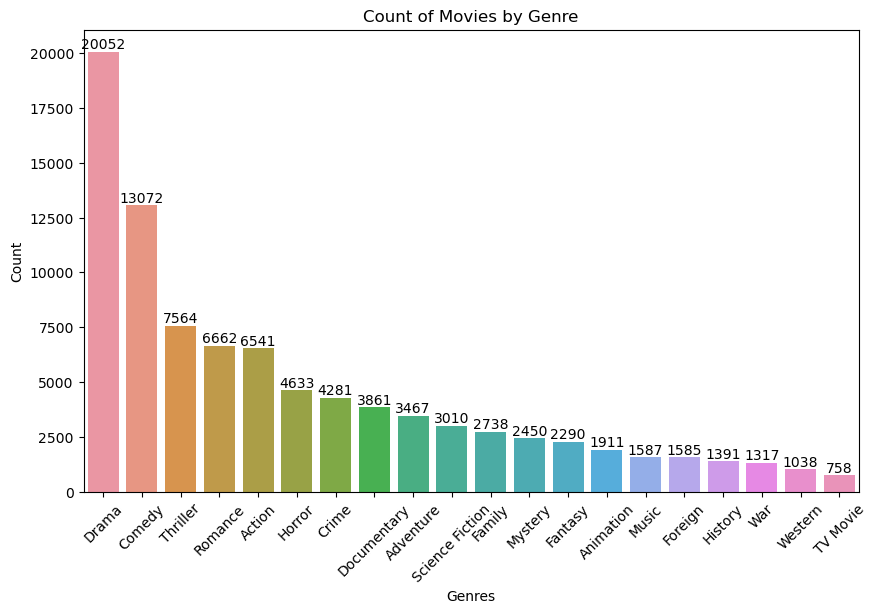

In [35]:
genres_df = metadata['genres'].explode()

# Get the genres count
genres_count = genres_df.value_counts()

plt.figure(figsize=(10, 6))  # Adjust the figure size if necessary
ax = sns.countplot(x = genres_df, order=genres_count.index)

# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Add count labels on each bar
for p, label in zip(ax.patches, genres_count.values):
    ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Add labels and title
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Count of Movies by Genre')

# Show the plot
plt.show()

The analysis reveals that a significant portion of the movies **genre** the audience is instrested in are **Drama, Comedy, and Thriller**. 

Additionally, when considering **mean vote averages**, genres such as **Documentary, War, and History** emerge as the top genres with the highest average ratings.

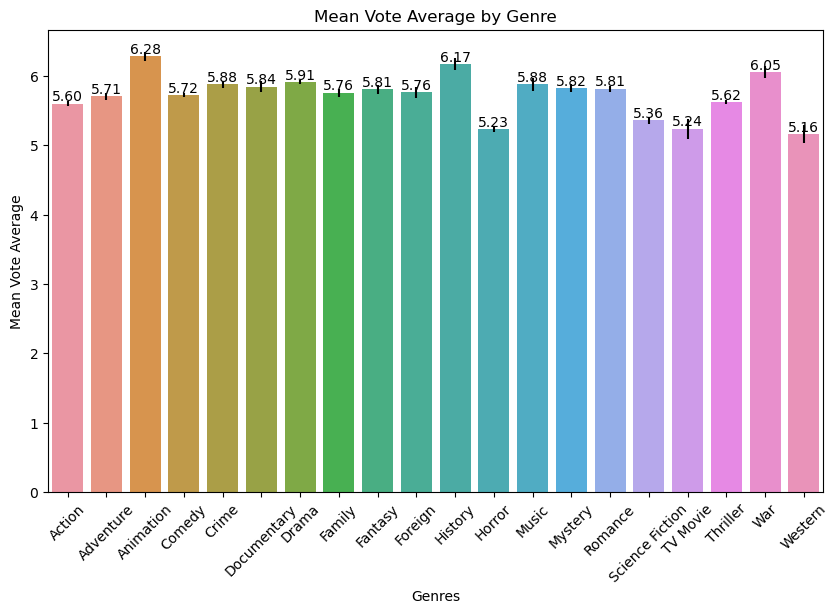

In [36]:
AvgByGenre = metadata.explode('genres').groupby('genres')['vote_average'].mean()

# Calculate confidence intervals (ci) for each genre
ci_by_genre = metadata.explode('genres').groupby('genres')['vote_average'].agg(lambda x: 1.96 * x.sem())

# Create a bar plot using seaborn with confidence intervals
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=AvgByGenre.index, y=AvgByGenre.values, yerr=ci_by_genre.values)

# Add mean values on each bar
for p, mean_value in zip(ax.patches, AvgByGenre.values):
    ax.annotate(f'{mean_value:.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')


# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Genres')
plt.ylabel('Mean Vote Average')
plt.title('Mean Vote Average by Genre')

# Show the plot
plt.show()

In [37]:
#Simple Recommendation: Best movie recommendation by Genre.
# Top 10 Action Movies
# metadata[metadata['genres'].apply(lambda genre_list: 'Action' in genre_list)][['title', 'genres', 'release_year', 'vote_average']].head(10)

### 3.5.6 Franchise

Lets dive a bit deeper into movie franchise movies. It would be interesting to see the longest running franchise and most successfull franchise. 

In [38]:
fr_df = metadata[metadata['belongs_to_collection'].notnull()]

In [39]:
fr_pivot = fr_df.pivot_table(index='belongs_to_collection', values='revenue', aggfunc={'revenue': ['mean', 'sum', 'count']}).reset_index()

### Most Successfull Movie Franchise

In [40]:
fr_pivot.sort_values('sum', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
551,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1157,Star Wars Collection,8,9.293118e+08,7.434495e+09
645,James Bond Collection,26,2.733450e+08,7.106970e+09
1314,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
965,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09
1546,Transformers Collection,5,8.732202e+08,4.366101e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
1487,The Twilight Collection,5,6.684215e+08,3.342107e+09
609,Ice Age Collection,5,6.433417e+08,3.216709e+09
665,Jurassic Park Collection,4,7.578710e+08,3.031484e+09


Most profitable franchise has been **Harry Potter Collection** followed by **Star Wars Collection**.

### Longest Running Franchises

In [41]:
fr_pivot.sort_values('count', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
645,James Bond Collection,26,2.733450e+08,7.106970e+09
472,Friday the 13th Collection,12,3.874155e+07,4.648985e+08
973,Pokémon Collection,9,6.687400e+07,6.018660e+08
551,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1157,Star Wars Collection,8,9.293118e+08,7.434495e+09
1429,The Pink Panther (Original) Collection,8,2.055978e+07,1.644782e+08
539,Halloween Collection,8,3.089601e+07,2.471681e+08
1314,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
29,A Nightmare on Elm Street Collection,8,4.544894e+07,3.635916e+08
974,Police Academy Collection,7,4.352046e+07,3.046432e+08


The Classic **James Bond Collection** has a whooping **26** movies in it's collection. 

### 3.5.7 Actors and Directors

This is another interesting category. We will be sure to use this in our content-based recommendation. For now lets look at the following. Actors with the most movies, Directors with the most movies, actors with the highest total revenue, Directors with the highest total revenue

### Actor With the Most Movies

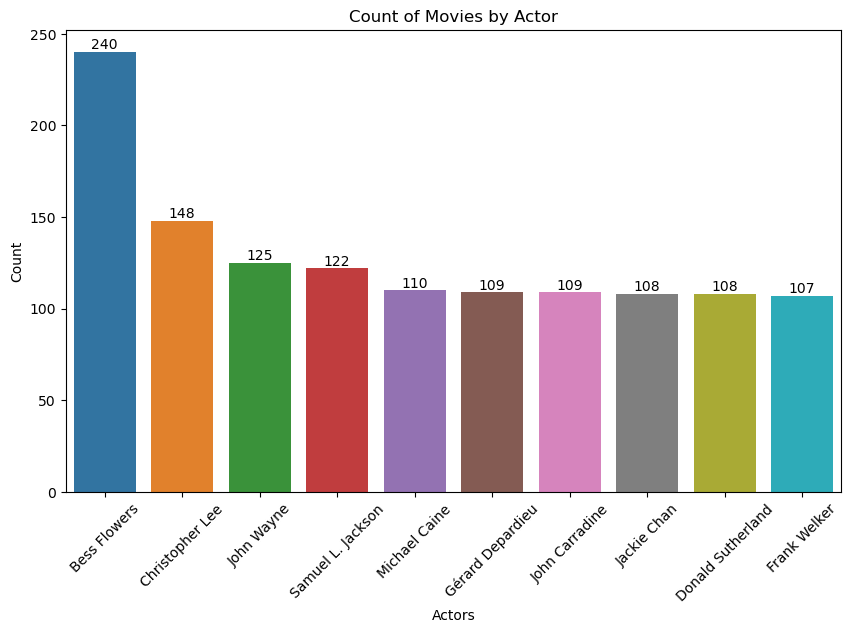

In [42]:
actor_df = metadata['actor_names'].explode()

# Get the actors count
actors_count = actor_df.value_counts().head(10)

plt.figure(figsize=(10, 6))  # Adjust the figure size if necessary
ax = sns.countplot(x = actor_df, order=actors_count.index)

# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Add count labels on each bar
for p, label in zip(ax.patches, actors_count.values):
    ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Add labels and title
plt.xlabel('Actors')
plt.ylabel('Count')
plt.title('Count of Movies by Actor')

# Show the plot
plt.show()

### Director With the Most Movies

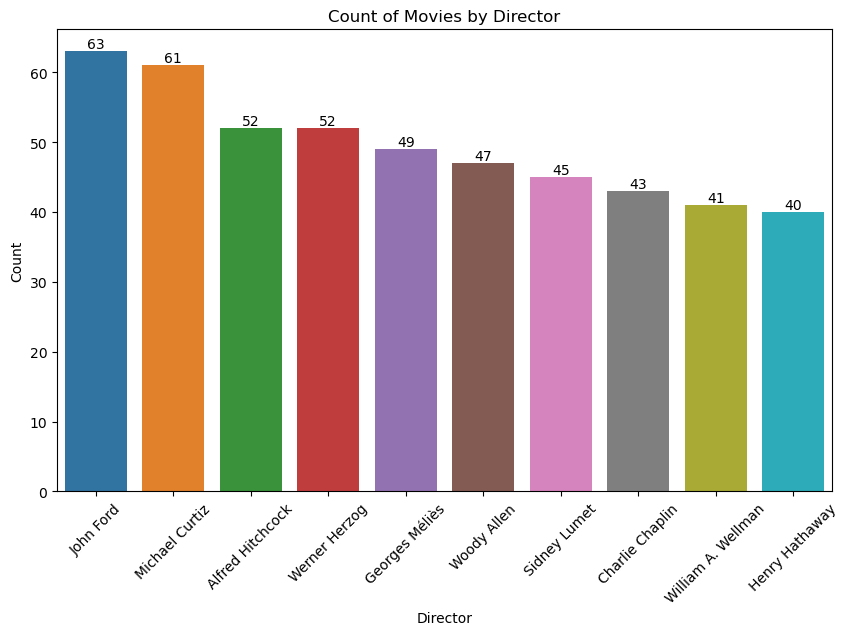

In [43]:
director_df = metadata['director'].explode()

# Get the actors count
director_count = director_df.value_counts().head(10)

plt.figure(figsize=(10, 6))  # Adjust the figure size if necessary
ax = sns.countplot(x = director_df, order=director_count.index)

# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Add count labels on each bar
for p, label in zip(ax.patches, director_count.values):
    ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Add labels and title
plt.xlabel('Director')
plt.ylabel('Count')
plt.title('Count of Movies by Director')

# Show the plot
plt.show()

The two plots above illustrate that **Bess Flower** holds the record for the **actor** with the highest number of movies acted in, while **John Ford** stands out as the **director** with the most films directed.

### Actors With the Highest Total Revenue

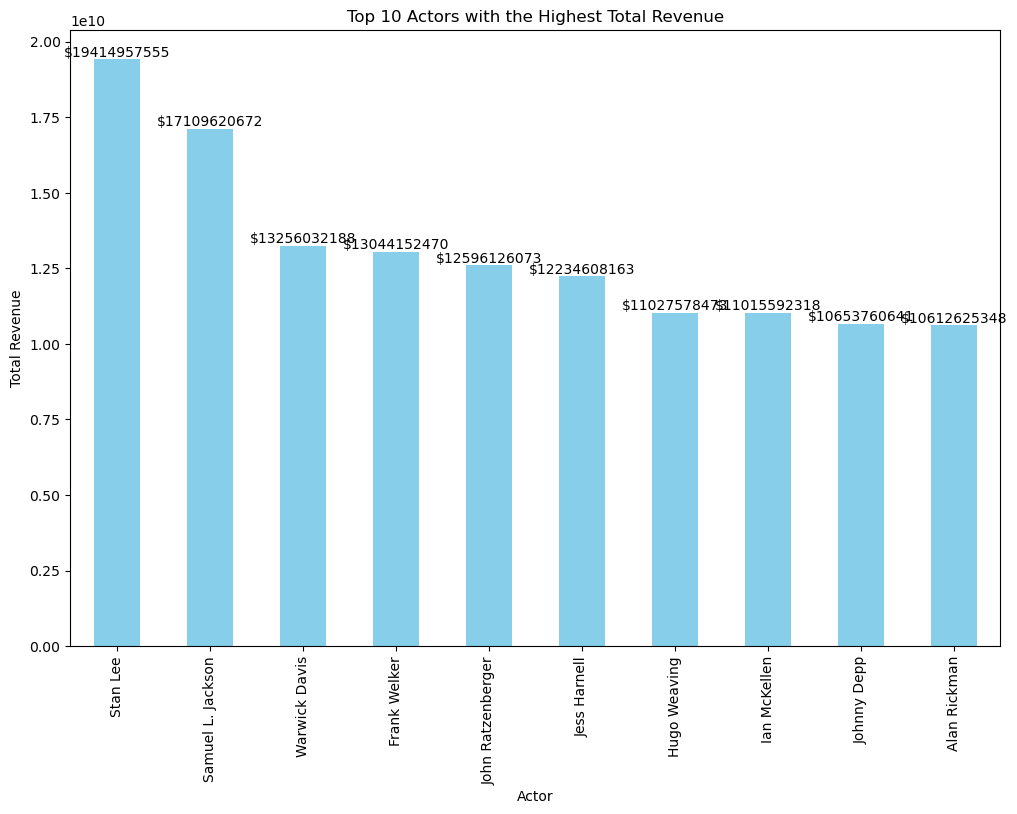

In [44]:
# Group by actor and calculate the sum of revenue, then select the top 10
top_actors = metadata.explode('actor_names').groupby('actor_names')['revenue'].sum().sort_values(ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(12, 8))
top_actors.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Actor')
plt.ylabel('Total Revenue')
plt.title('Top 10 Actors with the Highest Total Revenue')

# Add values on top of the bars
for i, value in enumerate(top_actors):
    plt.text(i, value + 0.5, f'${value:.0f}', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()

**Stan Lee**, Marvel's aurthor stands out as the **Actor with the Highest Total Revenue**, keep in mind that this is based off movie Revenue not the actual take home income by actor.

### Director With the Highest Total Revenue

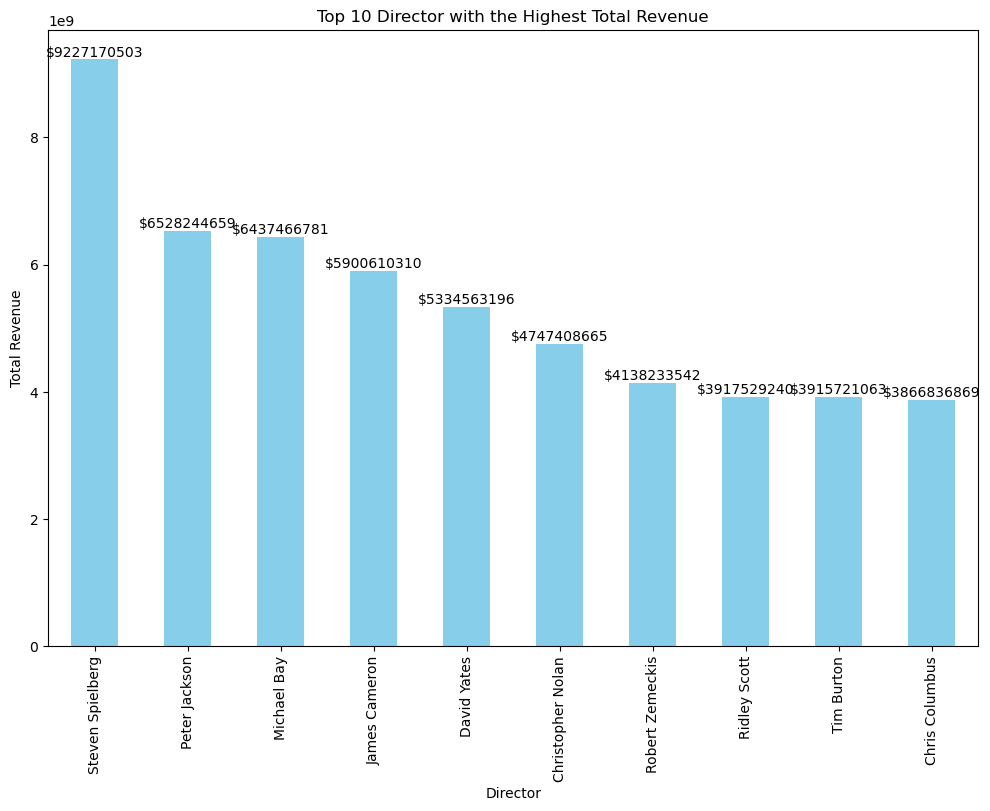

In [45]:
# Group by actor and calculate the sum of revenue, then select the top 10
top_director = metadata.groupby('director')['revenue'].sum().sort_values(ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(12, 8))
top_director.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Director')
plt.ylabel('Total Revenue')
plt.title('Top 10 Director with the Highest Total Revenue')

# Add values on top of the bars
for i, value in enumerate(top_director):
    plt.text(i, value + 0.5, f'${value:.0f}', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()

**Steven Spielberg** takes the lead as the **Director with the Highest Total Revenue**.  

## Conclusion

We have started off by cleaing the dataset further and removing unwanted features. Later we started exploring each and every feature in the dataset to gain further insight of the data. For few quantitative features we tried to see if theres any correlations. For example when we found high correlation between vote_count and revenue. We also looked at categorical data in may different ways. Few examples here are longest running Franchise or which director has the highest grossing movies. Overall, we have gained some usefull insight to the dataset that we can utilize in the next sections.

Some ideas we have gainded are as follows for our recommendation system.

**Simple recommendation:**
1. 'vote_average' - highest rated movie recommendation considering x# of minimum votes.
2. 'genere' - genre and vote_average based recommendation.

**Content based recommendation:**

1. 'Overview' (storyline) based recommendations 
2. Credits - actor/director based recommendations
3. 'Keyword' - Keywords associated with the movies for recommendations. might be easier than overview.

**Collaborative recommendation:**
1. rating - this would give rating on a movie for a user based on similar user likes.